# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Overview



The TMDb data set contains information about 4800 movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 20 columns about each movie's details, length, popularity.

Question that can analyised from this data set
Movies which had most and least profit
Movies with largest and lowest budgets
Movies with most and least earned revenue.
Movies with longest and shortest runtime values
Average runtime of all the movies.
In which year we had most no.of profitable movies.
Successful genres (with respest to the profitable movies).
Most frequent cast (with respest to the profitable movies)
Average budget (with respest to the profitable movies)
Average revenue (with respest to the profitable movies)
Average duration of the movie (with respest to the profitable movies)

In [2]:
#importing important files 
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
TMDb = pd.read_csv('./tmdb_5000_movies.csv', parse_dates=True)
TMDb.head() #printing first five rows 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
TMDb.shape #look at the shape of the data set

(4803, 20)

The data set has 4803 rows and 20 columns.

In [5]:
TMDb.columns #look at the columns of the data set

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')



### Data Cleaning (null values, select relevant columns, time series)

In [6]:
TMDb.isna().sum() # look at if there's null in the data set

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

There're some missing values in homepage, overview, release date, runtime, tagline, and year.

In [7]:
#creating a list of columb to be deleted
del_col=['homepage', 'keywords','overview','production_companies']

#deleting the columns
TMDb= TMDb.drop(del_col,1)

#previewing the new dataset
TMDb.head()

,budget,genres,id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Double check the new data set.

In [8]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(TMDb.duplicated())

0

There's no duplicate rows in the data set.

In [9]:
#the the given in the dataset is in string format.
#So we need to change this in datetime format

TMDb['release_date'] = pd.to_datetime(TMDb['release_date'])
TMDb['release_date'].head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

Double check the datetime format.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### How many movies was released every year?

In [10]:
TMDb['year']= TMDb.release_date.dt.year #create a year column

year
2013.0    231
2014.0    238
2015.0    216
2016.0    104
2017.0      1
Name: id, dtype: int64


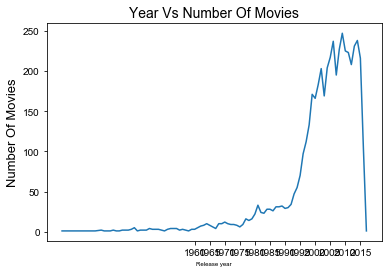

In [11]:
# make group for each year and count the number of movies in each year 
data=TMDb.groupby('year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
TMDb.groupby('year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 6)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

The total no. of movies increased drasitcally from 1995.

### Average runtime of the movies.

In [12]:
TMDb.runtime.mean() #look at average runtime of all movies

106.87585919600083

Average runtime of all movies is about 107 mins.

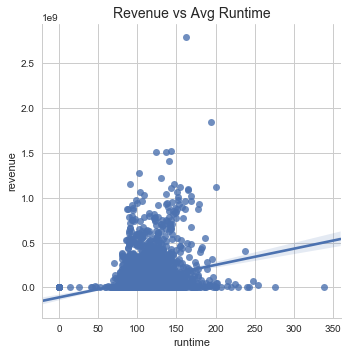

In [13]:
sns.lmplot(x='runtime', y='revenue', data=TMDb) #look at runtime and revenue
plt.title("Revenue vs Avg Runtime",fontsize = 14)
plt.show()

There's a positive relationship between runtime and revenue.

### Vote average distribution.

Text(0.5,1,'Vote Average')

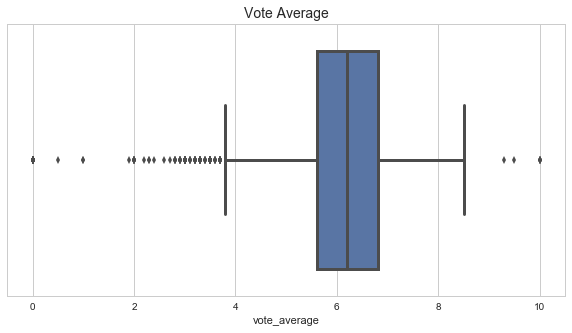

In [14]:
#using seaborn to generate the boxplot
sns.boxplot(TMDb['vote_average'], linewidth = 3)
plt.title('Vote Average',fontsize = 14)#look at distribution of vote average of the movies.

Distribution of vote average of the movies: vote average is about 6.3. Most vote is between 3.9 - 8.5.

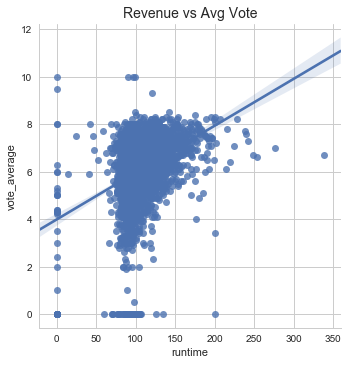

In [15]:
sns.lmplot(x='runtime', y='vote_average', data=TMDb) #there's a positive relationship on runtime and average vote 
plt.title('Revenue vs Avg Vote',fontsize = 14)
plt.show()

There's a positive relationship between average vote and revenue.

### What are the most profitable movies?

In [16]:
#calculate Profit for each of the movie
#add a new column in the dataframe name 'Profit'
TMDb['profit'] = TMDb['revenue'] - TMDb['budget']

In [17]:
TMDb['profit_in_thousand']=TMDb['profit']/1000

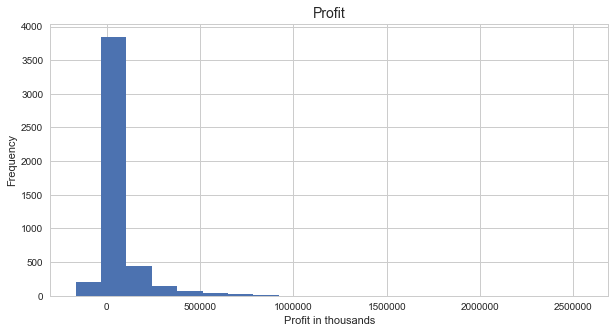

In [22]:
TMDb.profit_in_thousand.plot(kind='hist', bins=20);
plt.title('Profit',fontsize = 14);
plt.xlabel('Profit in thousands');
plt.ylabel('Frequency');

More movie has made some profit than losing money.

In [27]:
TMDb.profit.median()

2511317.0

50% of the movies has made more than $2 million in profit.

#### Top 10 movies with the highest profit.

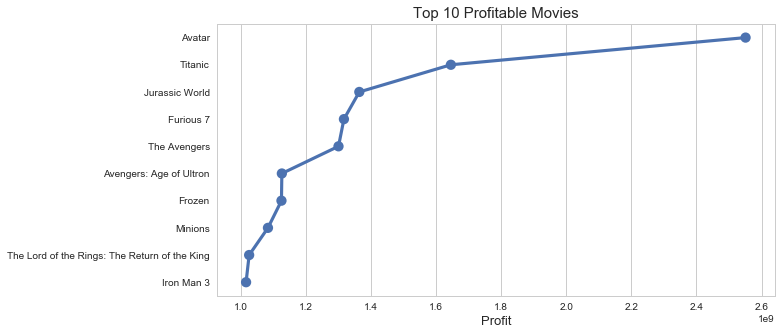

In [17]:
#sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(TMDb['profit'].sort_values(ascending = False))
info['original_title'] = TMDb['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

The most profitable movies are: Avatar, Titanic, and Jurassic Park.

### Which year has the highest profit?

In [18]:
#total profit of movies for every year 
profits_year = TMDb.groupby('year')['profit'].sum()

In [19]:
#To find that which year made the highest profit?
profits_year.idxmax()

2012.0

The movies released in year 2012 made the highet profit.

### What kinds of properties are associated with revenues?

In [20]:
TMDb.corr() #look at the correlations among all numeric variables.

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year,profit
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180,0.168990,0.575852
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128,0.434943,-0.033629
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130,0.101998,0.620854
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487,0.090192,0.978881
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944,-0.166849,0.219928
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997,-0.198499,0.208241
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000,0.114212,0.758379
year,0.168990,0.434943,0.101998,0.090192,-0.166849,-0.198499,0.114212,1.000000,0.057416
profit,0.575852,-0.033629,0.620854,0.978881,0.219928,0.208241,0.758379,0.057416,1.000000


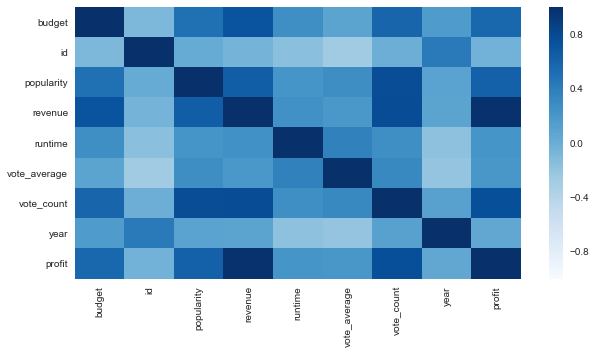

In [21]:
sns.heatmap(TMDb.corr(), vmin=-1, vmax=1, cmap="Blues") 
#as we can see from the heatmap and the correlation chart above
#revenue is highly correlated with budget, popularity, and vote_count.

Revenue is highly correlated with budget, vote counts, and popularity.

<a id='conclusions'></a>
### Conclusions

1. The total no. of movies increased drasitcally from 1995.
2. The most profitable movies are: Avatar, Titanic, and Jurassic Park.
3. The year 2012 has the highest profit.
4. Revenue is highly correlated with budget, vote counts, and popularity


### Limitations:
1. The analysis assuming the data is real and accurate.
2. The revenue is considered without inflation, for example: 10 million revenue 30 years ago worth more than 10 million in 2018.